# Propuesta Desarrollada

La propuesta a desarrollar se enfoca en encontrar el mejor modelo de segmentación de datos, considerando la evaluación de varios algoritmos de aprendizaje automático. El objetivo principal es identificar la metodología más eficaz para dividir un conjunto de datos en grupos más pequeños y homogéneos, lo que permitirá una personalización más precisa de las estrategias de marketing y la toma de decisiones más informadas.


# Metodología propuesta:

**Preparación de datos:** Antes de aplicar cualquier modelo, se realizará una exhaustiva preparación de los datos, que incluirá limpieza, normalización y selección de características relevantes.

**División de datos:** El conjunto de datos se dividirá en conjuntos de entrenamiento y prueba para evaluar la capacidad de generalización de cada modelo.

**Entrenamiento de modelos:** Se entrenarán todos los modelos mencionados anteriormente en el conjunto de entrenamiento.

**Evaluación de modelos:** Se utilizarán métricas de evaluación adecuadas para cada tipo de modelo (por ejemplo, precisión, F1-score, error cuadrático medio, etc.) en el conjunto de prueba para comparar el rendimiento de cada modelo.

**Ajuste de hiperparámetros:** Se ajustarán los hiperparámetros de los modelos para optimizar su rendimiento.

**Selección del mejor modelo:** Se seleccionará el modelo que demuestre el mejor rendimiento en términos de métricas de evaluación específicas y se validará su capacidad de segmentación en un conjunto de datos independiente si es posible.

**Implementación en producción:** Una vez seleccionado el mejor modelo, se implementará en la producción para llevar a cabo la segmentación de clientes de manera efectiva.

**Evaluación continua:** Se realizará un seguimiento continuo del modelo en producción para garantizar su eficacia a lo largo del tiempo y se considerarán ajustes si es necesario.

En resumen, esta propuesta busca encontrar el modelo de segmentación más efectivo a través de una evaluación exhaustiva de varios algoritmos de aprendizaje de máquina. La elección del modelo adecuado será fundamental para optimizar la personalización de las estrategias de marketing y mejorar la toma de decisiones empresariales.


# Colección y Preparación de datos

Los datos se obtienen a partir de una consulta que se raliza directamente en la base de datos. Para poder evaluar la segmentación, los Clientes deben cumplir los siguientes requerimientos:
 - Haber realizado ventas en los últimos dos años.
 - Que la colocación total sea mayor o igual que $100,000 COP.

La empresa cuenta con 465.111 Clientes que cumplen con los requerimientos mencionados anteriormente. A continuación se muestra las
distribuciones de datos de estos Clientes.



In [1]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('C:\\Users\\Andres\\Downloads\\MachingLerningUN\\MachingLerningUN\\jbook_ml202330\\docs\\Data.csv', sep=";")
df.head()


,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario
0,1.001941e+09,ATLANTICO,CALAMAR,22/11/1989,34,Femenino,1,69,1,750000
1,1.001866e+09,ATLANTICO,SABANALARGA,23/02/1989,35,Femenino,1,73,1,1826004
2,1.001865e+09,ATLANTICO,VILLA ROSA,22/04/1995,29,Femenino,1,4,1,4990000
3,1.001937e+09,ATLANTICO,SAN ESTANISLAO DE KOSTKA,28/08/2000,23,Femenino,1,14,1,4941200
4,1.007608e+09,MAGDALENA,BELLAVISTA (CONCORDIA) MAG,13/09/1992,32,Masculino,1,59,1,2120000


In [2]:
df.describe()

,Identificacion,Edad,Estrato,Recency,Frequency,Monetario
count,4.651110e+05,465111.000000,465111.000000,465111.000000,465111.000000,4.651110e+05
mean,1.702653e+08,56.738948,1.769823,38.874355,2.406742,4.369910e+06
std,3.543654e+08,14.751728,0.967396,29.100956,2.152173,3.506307e+06
min,2.088800e+04,19.000000,1.000000,0.000000,1.000000,1.001510e+05
25%,2.250359e+07,46.000000,1.000000,13.000000,1.000000,1.770000e+06
50%,3.282210e+07,57.000000,2.000000,33.000000,2.000000,3.410000e+06
75%,5.744020e+07,67.000000,2.000000,60.000000,3.000000,6.081000e+06
max,1.222197e+10,124.000000,6.000000,103.000000,55.000000,7.558485e+07


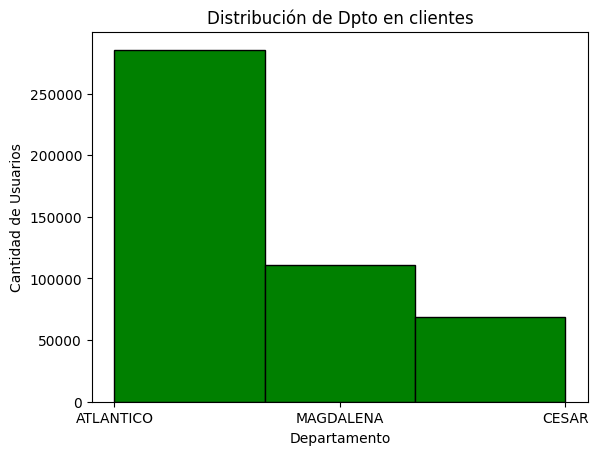

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
dfrecuencia = df['Departamento']

plt.hist(dfrecuencia, bins=3, edgecolor='k',color='green') 

plt.xlabel('Departamento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Dpto en clientes')

plt.show()


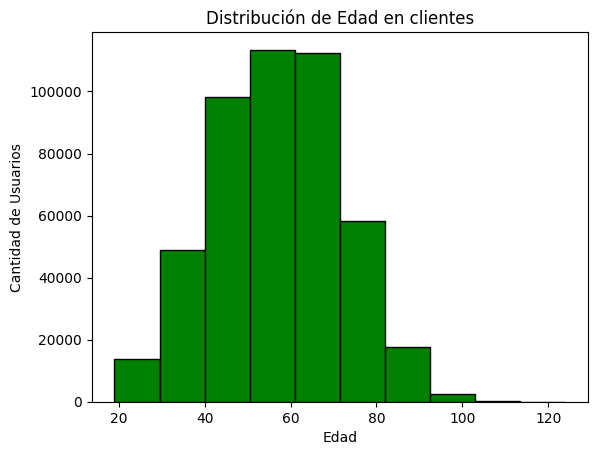

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
efrecuencia = df['Edad']

plt.hist(efrecuencia, bins=10, edgecolor='k', color='green') 

plt.xlabel('Edad')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Edad en clientes')

# Mostrar el gráfico
plt.show()

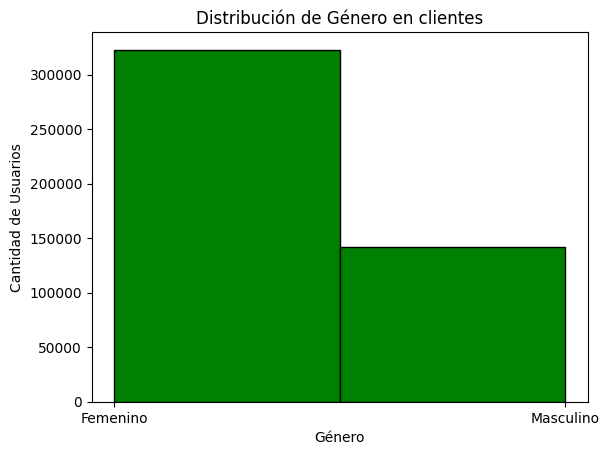

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
gfrecuencia = df['Genero']

plt.hist(gfrecuencia, bins=2, edgecolor='k', color='green') 

plt.xlabel('Género')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Género en clientes')

plt.show()

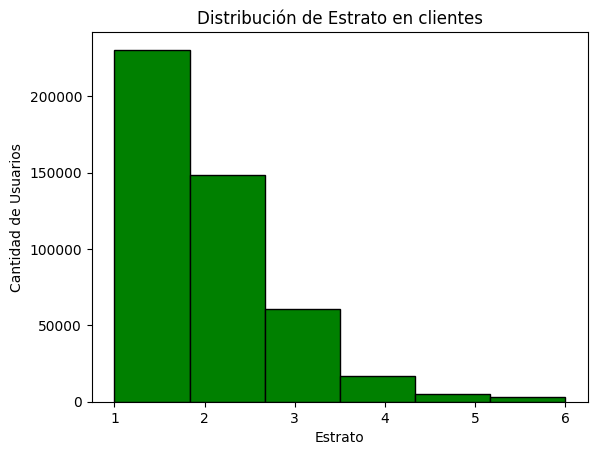

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
efrecuencia = df['Estrato']

plt.hist(efrecuencia, bins=6, edgecolor='k', color='green') 

plt.xlabel('Estrato')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Estrato en clientes')

plt.show()

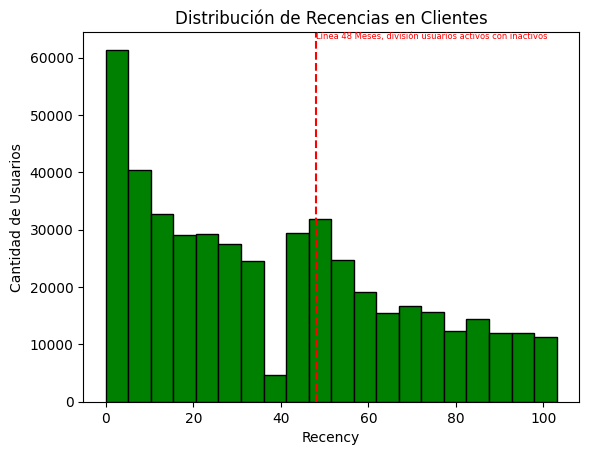

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
rfrecuencia = df['Recency']

plt.hist(rfrecuencia, bins=20, edgecolor='k', color='green')
plt.axvline(x=48, color='red', linestyle='--', label='Separador: Recency < 48') 

plt.xlabel('Recency')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Recencias en Clientes')
plt.text(48, plt.ylim()[1], 'Línea 48 Meses, división usuarios activos con inactivos', color='red', fontsize=6, va='top', ha='left')

plt.show()

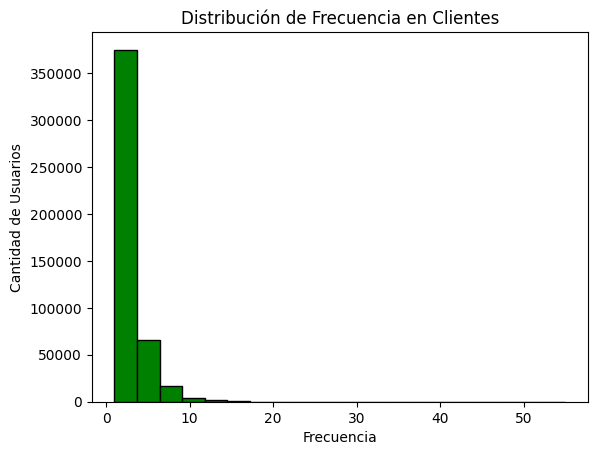

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
ffrecuencia = df['Frequency']

plt.hist(ffrecuencia, bins=20, edgecolor='k', color='green') 

plt.xlabel('Frecuencia')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Frecuencia en Clientes')

plt.show()

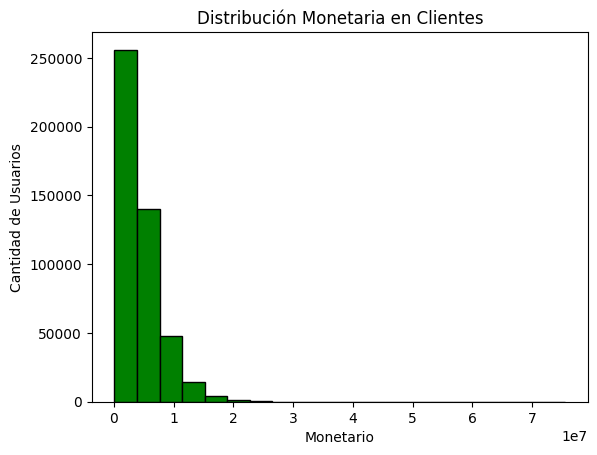

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
mfrecuencia = df['Monetario']

plt.hist(mfrecuencia, bins=20, edgecolor='k', color='green') 

plt.xlabel('Monetario')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución Monetaria en Clientes')

plt.show()

Antes de pasar los datos a un modelo de clustering, se tiene que hacer un procesamiento o “limpieza” de datos. Este procesamiento incluye
escalar todas las variables. Este proceso se realiza de la siguiente manera:

1. Se dividen los datos en dos grupos, Clientes Activos, y Clientes Inactivos:
   - Clientes Activos son los Clientes que han realizado una compra con Brilla en los ultimos 48 meses.
   - Clientes Inactivos son los Clientes que no han realizado una compra con Brilla por mas de 48 meses.



In [11]:
df_activos = df[df['Recency'] <= 48]
df_inactivos = df[df['Recency'] > 48]